# **英雄联盟大师预测**
- *背景介绍*：英雄联盟（League of Legends，LoL）是一个多人在线竞技游戏，由拳头游戏（Riot Games）公司出品。在游戏中，每位玩家控制一位有独特技能的英雄，红蓝两支队伍各有五位玩家进行对战，目标是摧毁对方的基地水晶。水晶有多座防御塔保护，通常需要先摧毁一些防御塔再摧毁水晶。玩家所控制的英雄起初非常弱，需要不断击杀小兵、野怪和对方英雄来获得金币、经验。经验可以提升英雄等级和技能等级，金币可以用来购买装备提升攻击、防御等属性。对战过程中一般没有己方单位在附近的地点是没有视野的，即无法看到对面单位，双方可以通过使用守卫来监视某个地点，洞察对面走向、制定战术。该电竞项目已入选包括亚运会在内的多项体育赛事，同时由游戏开发商（Riot Games）举办的LPL、LCK、MSI、全球总决赛等多项全球赛事，吸引了全球玩家的目光。因此，基于游戏数据实时预测胜负关系走向变得尤为重要。
- *数据来源*：**飞桨学习赛：英雄联盟大师预测**（ https://aistudio.baidu.com/overview ）
- *数据分布*：**训练集（train.csv）：180k条数据**,**测试集（test.csv）：20k条数据**
- 特征描述如下：  


| 特征名                      | 含义描述                                                                 |
|-----------------------------|--------------------------------------------------------------------------|
| `win`                       | 对局胜负结果，1代表胜利，0代表失败                                       |
| `kills`                     | 击杀数，本局游戏中成功击倒敌方英雄的次数                                 |
| `deaths`                    | 死亡数，英雄被敌方击倒的次数                                             |
| `assists`                   | 助攻数，协助队友完成击杀的次数，体现团队协作参与度                       |
| `largestkillingspree`       | 最大连杀数，单次连续击倒敌方英雄的最高次数（未死亡期间）                 |
| `largestmultikill`          | 最大多杀等级，记录本局触发过的最高多杀类型（如双杀、三杀等）             |
| `longesttimespentliving`     | 最长存活时间，英雄连续存活（未被击杀）的最长时长                         |
| `doublekills`               | 双杀次数，同时或短时间内击杀2名敌方英雄的次数                            |
| `triplekills`               | 三杀次数，同时或短时间内击杀3名敌方英雄的次数                            |
| `quadrakills`               | 四杀次数，同时或短时间内击杀4名敌方英雄的次数                            |
| `pentakills`                | 五杀次数，同时或短时间内击杀5名敌方英雄的次数                            |
| `totdmgdealt`               | 总伤害输出，向敌方（英雄、野怪、防御塔等）打出的伤害总量                 |
| `magicdmgdealt`             | 魔法伤害输出，总伤害中魔法类型伤害的量                                   |
| `physicaldmgdealt`          | 物理伤害输出，总伤害中物理类型伤害的量                                   |
| `truedmgdealt`              | 真实伤害输出，总伤害中无视护甲/魔抗的真实伤害量                           |
| `largestcrit`               | 最大暴击伤害，本局打出的单次暴击伤害的最高值                             |
| `totdmgtochamp`             | 对英雄总伤害，专门统计对敌方英雄造成的伤害总和                           |
| `magicdmgtochamp`           | 对英雄魔法伤害，对敌方英雄造成的魔法类型伤害量                           |
| `physdmgtochamp`            | 对英雄物理伤害，对敌方英雄造成的物理类型伤害量                           |
| `truedmgtochamp`            | 对英雄真实伤害，对敌方英雄造成的真实类型伤害量                           |
| `totheal`                   | 总治疗量，为本方英雄回复的生命值总和（自身回血、队友加血等）             |
| `totunitshealed`            | 治疗单位总数，被治疗的英雄、野怪等单位的数量                             |
| `dmgtoturrets`              | 对防御塔伤害，向敌方防御塔造成的伤害总量                                 |
| `timecc`                    | 控制时长，英雄被敌方控制技能（眩晕、减速等）影响的总时间                 |
| `totdmgtaken`               | 总承受伤害，英雄受到的伤害总量（来自敌方英雄、野怪等）                   |
| `magicdmgtaken`             | 承受魔法伤害，受到的魔法类型伤害量                                       |
| `physdmgtaken`              | 承受物理伤害，受到的物理类型伤害量                                       |
| `truedmgtaken`              | 承受真实伤害，受到的真实类型伤害量                                       |
| `wardsplaced`               | 插眼数，在地图中放置侦查守卫（提供视野）的数量                           |
| `wardskilled`               | 排眼数，摧毁敌方侦查守卫（破坏视野）的数量                               |
| `firstblood`                | 一血，本局第一个完成的英雄击杀，影响前期节奏                             |
  


### **一、数据导入+预处理**
#### 1.1 数据导入

In [122]:
# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体为 SimHei，并解决负号显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 显示负号


In [65]:
#  数据导入
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
train_df.head()

,id,win,kills,deaths,assists,largestkillingspree,largestmultikill,longesttimespentliving,doublekills,triplekills,...,totunitshealed,dmgtoturrets,timecc,totdmgtaken,magicdmgtaken,physdmgtaken,truedmgtaken,wardsplaced,wardskilled,firstblood
0,0,0,1,5,2,0,1,569,0,0,...,2,0,0,7819,2178,5239,401,4,1,0
1,1,0,5,8,7,3,1,880,0,0,...,4,303,0,24637,5607,17635,1394,10,0,0
2,2,1,1,6,16,0,1,593,0,0,...,3,329,0,18749,3651,14834,263,7,1,0
3,3,0,1,2,0,0,1,381,0,0,...,1,0,0,12134,1739,10318,76,8,1,0
4,4,0,4,11,25,0,1,455,0,0,...,8,0,0,27891,14068,12749,1073,34,2,0


#### 1.2 数据预处理

In [66]:
# 查看缺失值情况
train_df.isnull().sum()+test_df.isnull().sum()

assists                   0.0
deaths                    0.0
dmgtoturrets              0.0
doublekills               0.0
firstblood                0.0
id                        0.0
kills                     0.0
largestcrit               0.0
largestkillingspree       0.0
largestmultikill          0.0
longesttimespentliving    0.0
magicdmgdealt             0.0
magicdmgtaken             0.0
magicdmgtochamp           0.0
pentakills                0.0
physdmgtaken              0.0
physdmgtochamp            0.0
physicaldmgdealt          0.0
quadrakills               0.0
timecc                    0.0
totdmgdealt               0.0
totdmgtaken               0.0
totdmgtochamp             0.0
totheal                   0.0
totunitshealed            0.0
triplekills               0.0
truedmgdealt              0.0
truedmgtaken              0.0
truedmgtochamp            0.0
wardskilled               0.0
wardsplaced               0.0
win                       NaN
dtype: float64

In [67]:
# 查看重复值情况
train_df.duplicated().sum() 

0

数据较为干净，不存在缺失值，但存在538条重复数据，需删除处理。

In [68]:
# 删除训练集的重复值
train_df.drop_duplicates(inplace=True)


In [69]:
# 查看输赢分布
display(train_df.groupby('win').size())

win
0    90009
1    89991
dtype: int64

训练集中包含失败对局89476条，胜利对局89986条，数据量平均，且数据量足够大，足以支撑后续模型训练与预测。

In [70]:
# 删除无用特征
train_df = train_df.drop(['id'], axis=1)
test_df = test_df.drop(['id'], axis=1)

#### 1.3 数据简要描述

In [71]:
# 查看数据集的形状
print(f"训练集形状：{train_df.shape},测试集形状{test_df.shape}")

# 查看特征名
print(f"训练集特征名：{train_df.columns.tolist()}")

训练集形状：(180000, 31),测试集形状(20000, 30)
训练集特征名：['win', 'kills', 'deaths', 'assists', 'largestkillingspree', 'largestmultikill', 'longesttimespentliving', 'doublekills', 'triplekills', 'quadrakills', 'pentakills', 'totdmgdealt', 'magicdmgdealt', 'physicaldmgdealt', 'truedmgdealt', 'largestcrit', 'totdmgtochamp', 'magicdmgtochamp', 'physdmgtochamp', 'truedmgtochamp', 'totheal', 'totunitshealed', 'dmgtoturrets', 'timecc', 'totdmgtaken', 'magicdmgtaken', 'physdmgtaken', 'truedmgtaken', 'wardsplaced', 'wardskilled', 'firstblood']


可见，训练集包含180k条数据，测试集包含20k条数据。特征包括击杀数（kills）、死亡数（deaths）、助攻数（assists）等多项MOBA游戏常见指标在内的共30个特征，以及训练集另包含标签胜负（win：0表示失败，1表示胜利）。基于此数据集将展开进一步分析与预测。

In [72]:
# 数据集描述
display("训练集：",train_df.describe(),"测试集：",test_df.describe())

'训练集：'

,win,kills,deaths,assists,largestkillingspree,largestmultikill,longesttimespentliving,doublekills,triplekills,quadrakills,...,totunitshealed,dmgtoturrets,timecc,totdmgtaken,magicdmgtaken,physdmgtaken,truedmgtaken,wardsplaced,wardskilled,firstblood
count,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,...,180000.000000,180000.000000,180000.0,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000
mean,0.499950,5.795678,5.810878,8.320794,2.671606,1.332144,630.733950,0.539844,0.073089,0.010272,...,2.254050,2136.092411,0.0,23228.755922,8134.841144,14042.519978,1050.638139,11.507839,1.782161,0.100022
std,0.500001,4.600966,3.262843,5.933408,2.536605,0.757734,311.376387,0.924028,0.295922,0.104987,...,2.475993,2931.576096,0.0,11868.459781,5156.613342,7754.271825,1268.120844,7.543878,2.224708,0.300030
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,3.000000,4.000000,0.000000,1.000000,433.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.0,15266.000000,4521.000000,8630.000000,274.000000,7.000000,0.000000,0.000000
50%,0.000000,5.000000,6.000000,7.000000,2.000000,1.000000,591.000000,0.000000,0.000000,0.000000,...,1.000000,983.000000,0.0,21533.000000,7243.000000,12803.000000,655.000000,10.000000,1.000000,0.000000
75%,1.000000,8.000000,8.000000,12.000000,4.000000,2.000000,792.000000,1.000000,0.000000,0.000000,...,3.000000,3215.000000,0.0,29466.000000,10740.000000,18206.000000,1353.000000,14.000000,3.000000,0.000000
max,1.000000,39.000000,23.000000,52.000000,31.000000,5.000000,3038.000000,11.000000,7.000000,4.000000,...,98.000000,55083.000000,0.0,118130.000000,55323.000000,73172.000000,25140.000000,322.000000,48.000000,1.000000


'测试集：'

,kills,deaths,assists,largestkillingspree,largestmultikill,longesttimespentliving,doublekills,triplekills,quadrakills,pentakills,...,totunitshealed,dmgtoturrets,timecc,totdmgtaken,magicdmgtaken,physdmgtaken,truedmgtaken,wardsplaced,wardskilled,firstblood
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.00000,20000.0,20000.000000,20000.0000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000
mean,5.824350,5.804000,8.341550,2.670050,1.331650,628.711000,0.544050,0.074400,0.009900,0.001900,...,2.244900,2157.26640,0.0,23208.528500,8151.9398,14012.653700,1043.178450,11.51235,1.789150,0.103600
std,4.644316,3.272617,5.938372,2.548432,0.760781,313.293239,0.932042,0.295582,0.100511,0.043549,...,2.534392,2958.76849,0.0,11920.740082,5200.9671,7752.803808,1248.245208,7.50279,2.238134,0.304749
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.0,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,2.000000,3.000000,4.000000,0.000000,1.000000,433.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.00000,0.0,15234.000000,4523.0000,8586.000000,272.000000,7.00000,0.000000,0.000000
50%,5.000000,6.000000,7.000000,2.000000,1.000000,586.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1012.00000,0.0,21510.000000,7273.0000,12806.500000,661.000000,10.00000,1.000000,0.000000
75%,8.000000,8.000000,12.000000,4.000000,2.000000,790.000000,1.000000,0.000000,0.000000,0.000000,...,3.000000,3288.00000,0.0,29441.500000,10729.0000,18201.250000,1342.250000,14.00000,3.000000,0.000000
max,33.000000,20.000000,41.000000,21.000000,5.000000,2842.000000,8.000000,4.000000,2.000000,1.000000,...,74.000000,46826.00000,0.0,116147.000000,71631.0000,68612.000000,20189.000000,112.00000,46.000000,1.000000


In [73]:
# 输赢部分标签比较（选取'kills','deaths','assists','totheal','wardskilled', 'firstblood'等关键特征）
display(train_df.groupby('win')[['kills','deaths','assists','totheal','wardskilled', 'firstblood']].describe().T)

win                           0             1
kills       count  90009.000000  89991.000000
            mean       4.588797      7.002800
            std        3.944681      4.885141
            min        0.000000      0.000000
            25%        2.000000      3.000000
            50%        4.000000      6.000000
            75%        7.000000     10.000000
            max       35.000000     39.000000
deaths      count  90009.000000  89991.000000
            mean       7.003833      4.617684
            std        3.047038      3.026727
            min        0.000000      0.000000
            25%        5.000000      2.000000
            50%        7.000000      4.000000
            75%        9.000000      6.000000
            max       23.000000     23.000000
assists     count  90009.000000  89991.000000
            mean       6.506349     10.135602
            std        5.091105      6.156873
            min        0.000000      0.000000
            25%        3.000000      6.000000
            50%        5.000000      9.000000
            75%        9.000000     14.000000
            max       48.000000     52.000000
totheal     count  90009.000000  89991.000000
            mean    4765.210657   6016.223122
            std     5051.051893   5865.715429
            min        0.000000      0.000000
            25%     1416.000000   2118.000000
            50%     3270.000000   4340.000000
            75%     6415.000000   8061.000000
            max    79848.000000  96218.000000
wardskilled count  90009.000000  89991.000000
            mean       1.701130      1.863209
            std        2.185876      2.259988
            min        0.000000      0.000000
            25%        0.000000      0.000000
            50%        1.000000      1.000000
            75%        2.000000      3.000000
            max       48.000000     40.000000
firstblood  count  90009.000000  89991.000000
            mean       0.080770      0.119279
            std        0.272483      0.324118
            min        0.000000      0.000000
            25%        0.000000      0.000000
            50%        0.000000      0.000000
            75%        0.000000      0.000000
            max        1.000000      1.000000

英雄联盟对局特征与胜负（win）关系分析
基于数据集，从MOBA游戏逻辑（击杀、生存、协作、资源等），对比胜负对局关键特征：

1、核心战斗数据
|特征|失败（win=0）|胜利（win=1）|分析|
| ---- | ---- | ---- | ---- |
|**kills（击杀）**|均值4.59，中位数4，75%分位7|均值7.00，中位数6，75%分位10|胜利方击杀效率更高，通过击杀积累经济、压制敌方，是胜利的**结果体现与优势扩大点** |
|**deaths（死亡）**|均值7.01，中位数7，75%分位9|均值4.62，中位数4，75%分位6|失败方死亡更多，频繁掉点丢失节奏，胜利方低死亡保障持续压制，是胜利的**基础保障** | 
|**assists（助攻）**|均值6.51，中位数5，75%分位9|均值10.14，中位数9，75%分位14|胜利方助攻更高，体现团队协作紧密，通过联动滚起团队优势，是胜利的**协作标志** | 

2、资源与续航
|特征|失败（win=0）|胜利（win=1）|分析|
| ---- | ---- | ---- | ---- |
|**totheal（治疗量）**|均值4765，中位数3270，75%分位6415|均值6016，中位数4340，75%分位8061|胜利方治疗量更高，反映续航能力强（辅助保人、吸血装备生效），降低减员风险，是胜利的**续航支撑** | 
|**wardskilled（排眼数）**|均值1.70，中位数1，75%分位2|均值1.86，中位数1，75%分位3|胜利方排眼略多，体现反侦查意识，通过控制视野找机会，是胜利的**信息辅助项** | 

3、前期节奏
|特征|失败（win=0）|胜利（win=1）|分析|
| ---- | ---- | ---- | ---- |
|**firstblood（一血）**|均值0.09，中位数0|均值0.12，中位数0|胜利方一血率稍高，能小幅度加速前期优势，但因一局只会产生一个firstblood，对全局影响有限，是胜利的**前期加分项** | 

4.总结  
胜利方通过 **低死亡维持节奏**→**高击杀/助攻扩大团队优势**→**高治疗保障续航**→**排眼掌握信息**，辅以一血加速前期，将团队协作、运营能力转化为数据优势，最终导向胜利（win=1） 。核心逻辑是 MOBA 游戏“团队联动+资源运营决定胜负”的体现，数据差异为游戏本质的量化结果。

##  二、数据可视化
#### 2.1 绘制数据输赢分布

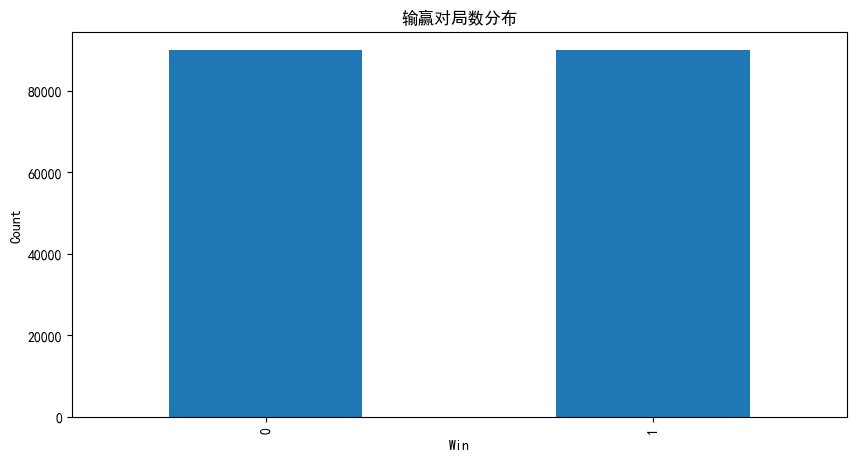

In [107]:
# 输赢对局数分布
plt.figure(figsize=(10, 5))
train_df['win'].value_counts().plot(kind='bar')
plt.title('输赢对局数分布')
plt.xlabel('Win')
plt.ylabel('Count')

plt.show()

由柱状图可见，数据胜负双方分布十分平均，无偏移现象。

<Figure size 4000x3600 with 0 Axes>

#### 2.2 数据特征值分布

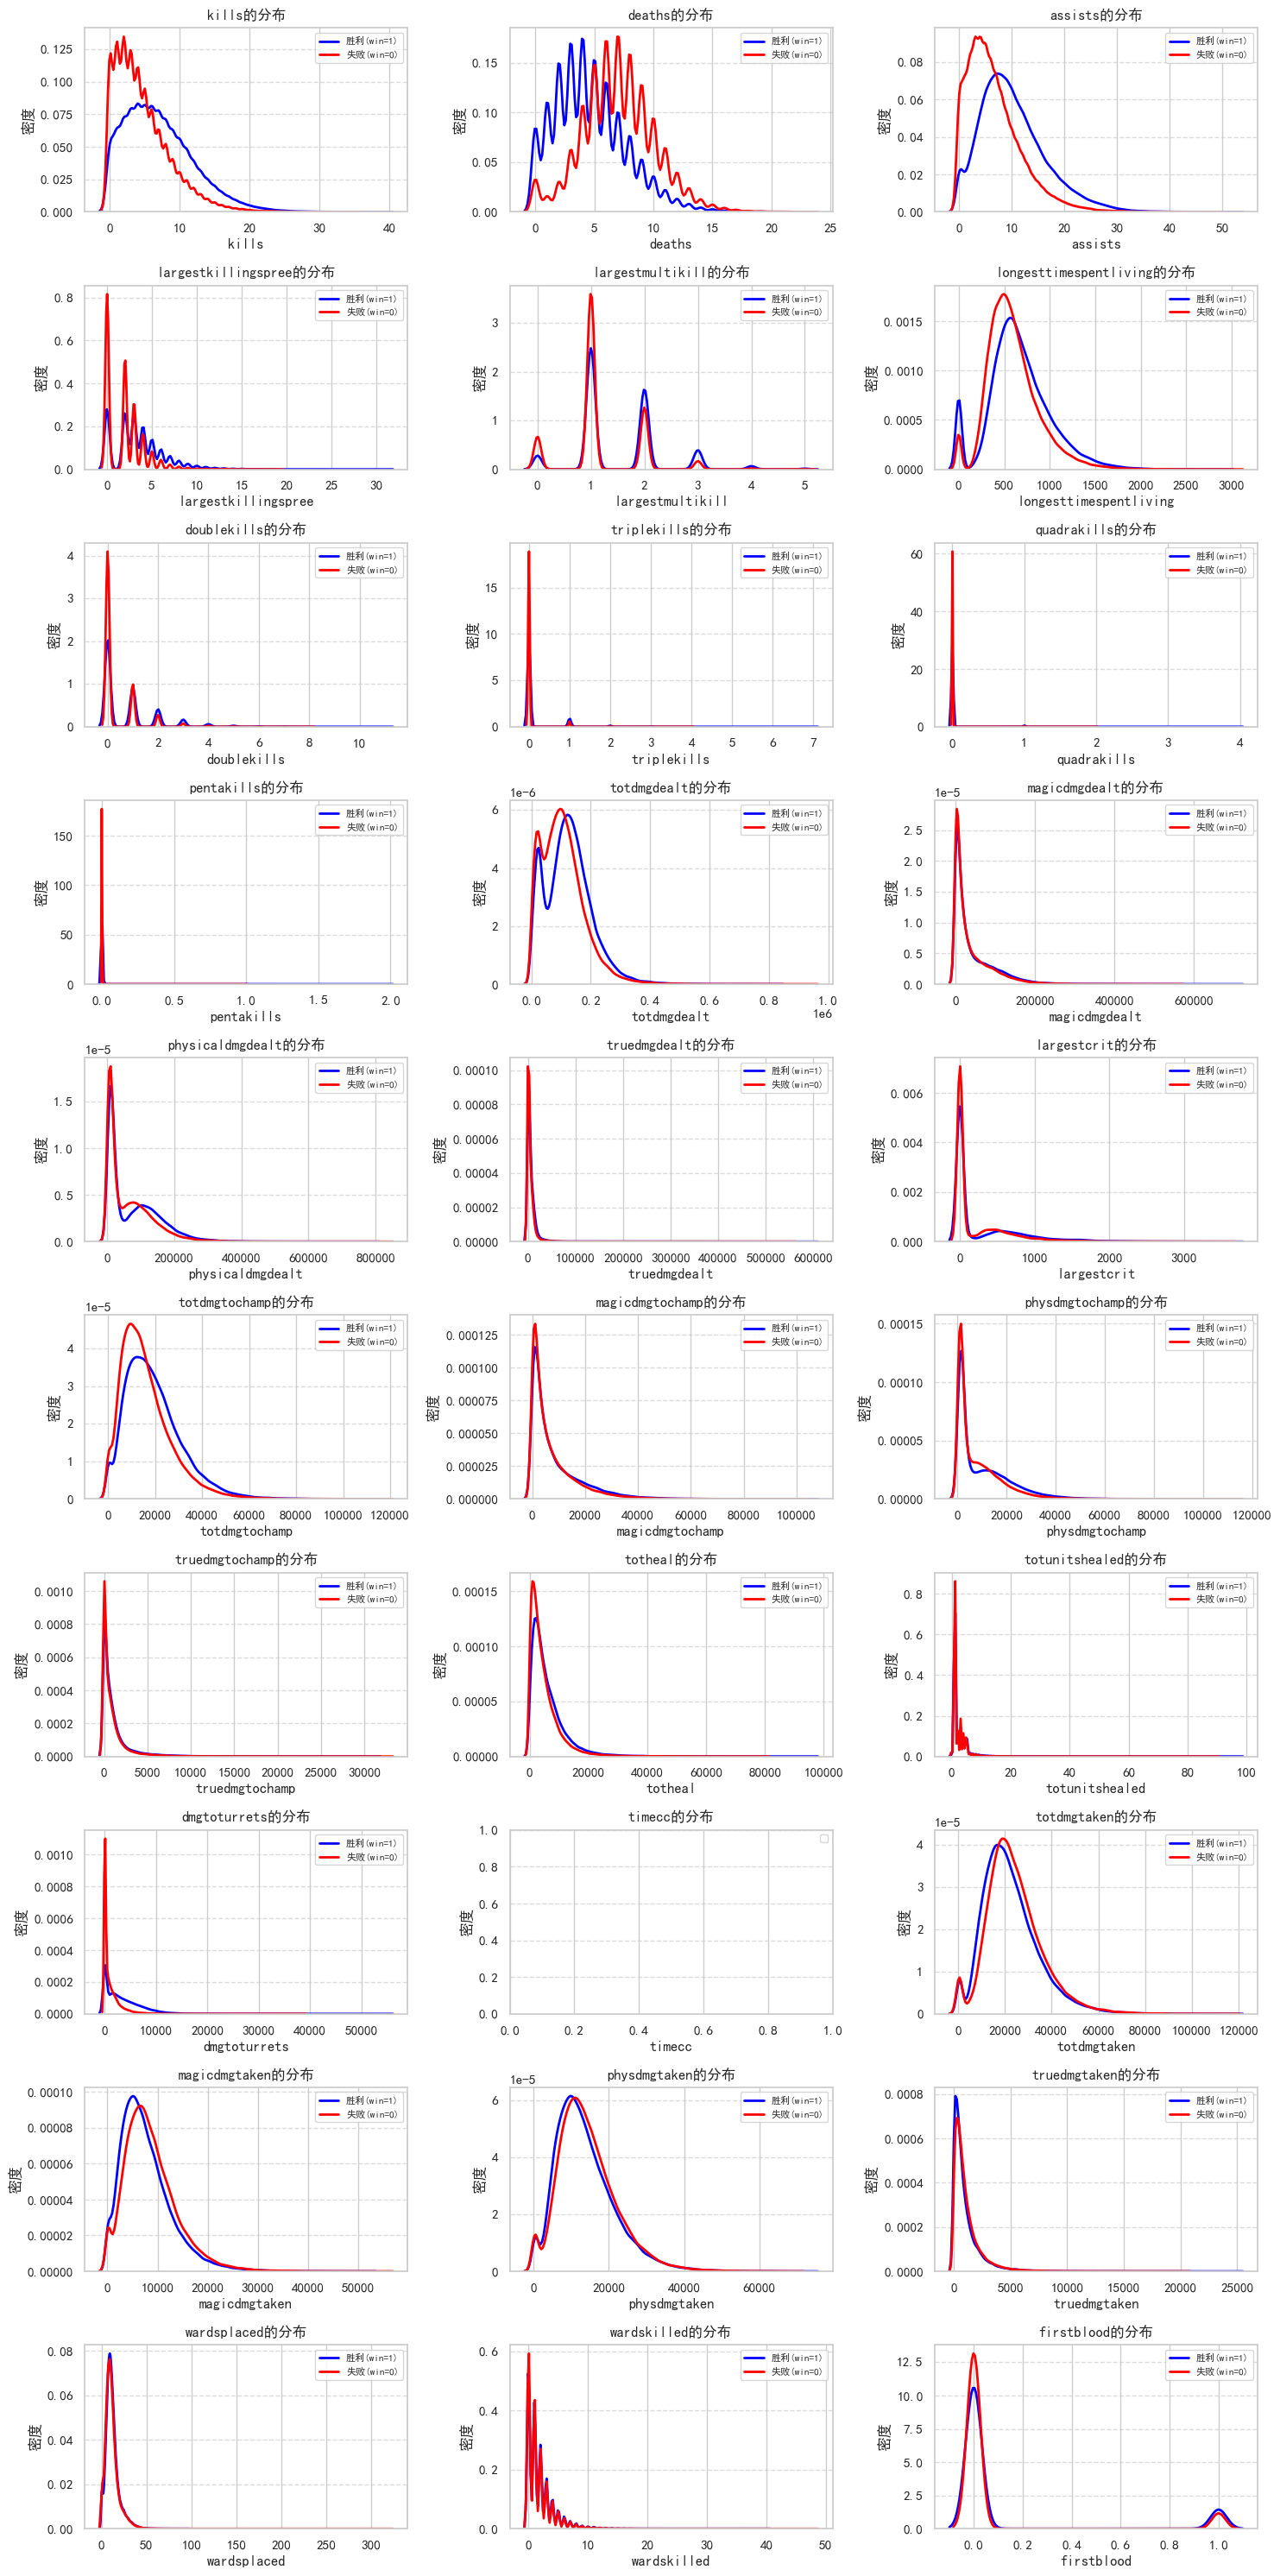

In [123]:
# 提取特征列（排除目标变量win）
features = [col for col in train_df.columns if col != 'win']

# 计算子图行列数
n_features = len(features)
n_cols = 3  # 固定3列
n_rows = int(np.ceil(n_features / n_cols))  # 动态计算行数

# 设置画布大小
plt.figure(figsize=(15, 3 * n_rows))  # 高度根据特征数量动态调整

# 按特征绘制分布图
for i, feature in enumerate(features, 1):
    plt.subplot(n_rows, n_cols, i)
    
    # 按win分组绘制KDE曲线（不显示直方图）
    sns.kdeplot(train_df[train_df['win'] == 1][feature], 
                color='blue', linewidth=2, label='胜利(win=1)')
    sns.kdeplot(train_df[train_df['win'] == 0][feature], 
                color='red', linewidth=2, label='失败(win=0)')
    
    plt.title(f"{feature}的分布")
    plt.xlabel(feature)
    plt.ylabel("密度")
    plt.legend(fontsize=8)  # 缩小图例字体
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # 添加横向网格线

# 自动调整布局
plt.tight_layout()
plt.show()

基于 KDE 曲线（蓝色为胜利、红色为失败），聚焦核心特征解读：
1. kills（击杀数）
胜利局曲线整体右移，峰值更高且覆盖高击杀区间（如 10 - 30），说明胜利方更易打出多击杀，靠击杀积累经济 / 节奏优势；失败局集中低击杀（0 - 10），击杀不足难突破局面。
2. deaths（死亡数）
失败局曲线峰值更高且覆盖高死亡区间（5 - 15），胜利局集中低死亡（0 - 10）。死亡多会打乱节奏、送资源，失败方因频繁掉点陷入被动；胜利方控死保节奏，持续压制。
3. assists（助攻数）
胜利局曲线右移且峰值更高（10 - 30 区间占优），体现团队协作紧密，多人联动击杀 / 转线，把个人优势转化为团队胜势；失败局助攻少，单打独斗难形成合力。
4. largestkillingspree（最大连杀数）
胜利局在高连杀（5 - 20）有明显分布，说明胜利方更易打出滚雪球的连杀，通过持续击杀扩大优势；失败局集中低连杀（0 - 5），难通过爆发性击杀扭转局面。  
5. 其他特征  
像 largestmultikill（多杀等级）、doublekills（双杀）等，胜利局在高多杀区间有微弱优势，但整体区分度低；totdmgdealt（总伤害）、magicdmgdealt（魔法伤害）等伤害类特征，胜利局曲线略右移，反映 “高输出助力胜利”，但因伤害类型复杂（受英雄、出装影响），区分度不如核心战斗指标直接。其余KDE曲线胜负双方差异不大，表明双方总体水平接近，间接表明了英雄联盟匹配机制的优秀（）。

#### 2.3 部分特征值详细分析

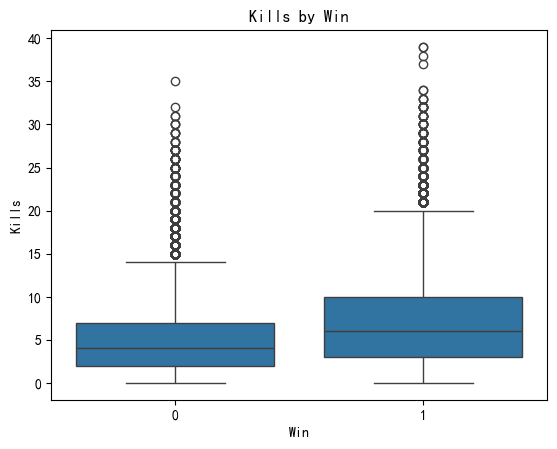

In [108]:
import seaborn as sns
sns.boxplot(y='kills', x='win', data=train_df)
plt.title('Kills by Win')
plt.xlabel('Win')
plt.ylabel('Kills')
plt.show()

从箱线图看：
1. **胜利局（win=1）**：击杀数（kills）整体更高，中位数、四分位数范围均大于失败局（win=0），且存在较多高击杀 outliers ，说明胜利方往往能打出更多击杀，靠击杀积累优势赢下对局。
2. **失败局（win=0）**：击杀数相对低且集中，高击杀极端值少（高击杀但对局失利的情况下可能是游戏后期呗一波翻盘），反映失败方在击杀端表现弱，难以通过击杀建立优势，更易陷入被动输掉比赛 。 本质体现 MOBA 游戏里“击杀创造优势、助力胜利”的逻辑，胜利局常伴随更多有效击杀。

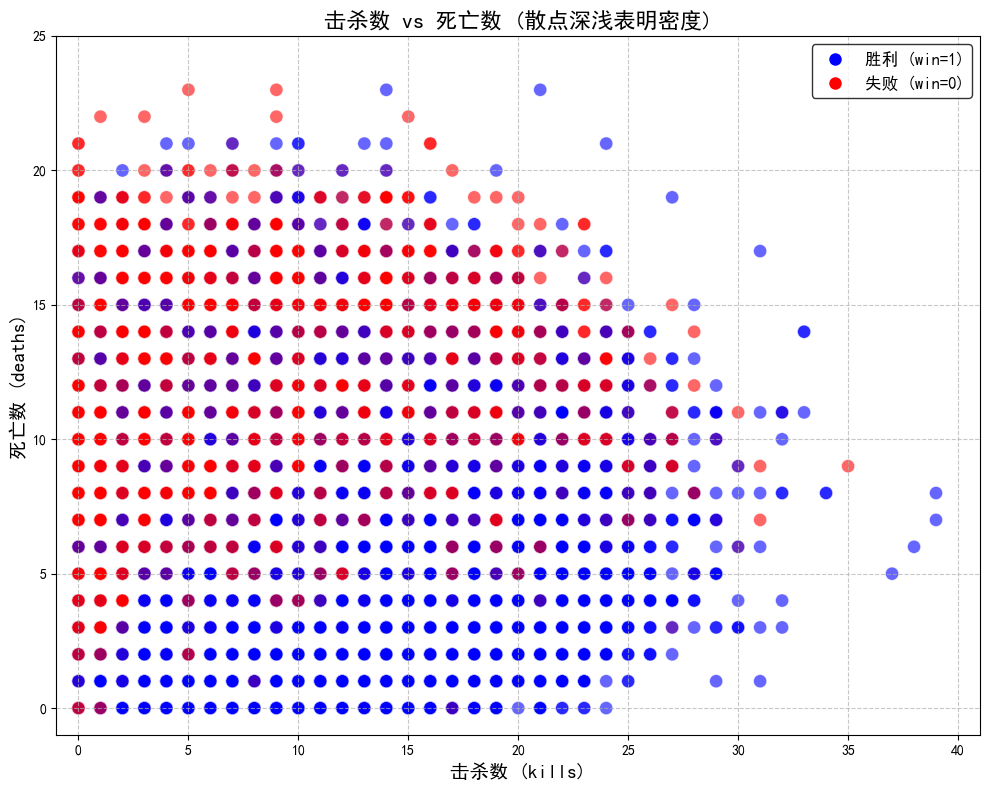

In [ ]:
# 创建颜色映射，0为失败(红色)，1为胜利(蓝色)
colors = np.where(train_df['win'] == 1, 'blue', 'red')

# 绘制散点图
plt.figure(figsize=(10, 8)) 
scatter = plt.scatter(
    train_df['kills'], 
    train_df['deaths'], 
    c=colors, 
    alpha=0.6,  
    s=90,  
    edgecolor='w',  
    linewidth=0.5  
)


plt.legend(
    handles=[
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='胜利 (win=1)'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='失败 (win=0)')
    ],
    loc='upper right',  
    frameon=True,  
    framealpha=0.8,  
    edgecolor='black', 
    fontsize=12  
)

plt.title('击杀数 vs 死亡数 (散点深浅表明密度)', fontsize=16)
plt.xlabel('击杀数 (kills)', fontsize=14)
plt.ylabel('死亡数 (deaths)', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)

# 设置坐标轴范围（可选，根据数据分布调整）
plt.xlim(-1, train_df['kills'].max() + 2)
plt.ylim(-1, train_df['deaths'].max() + 2)

# 显示图表
plt.tight_layout()
plt.show()

从可视化结果看，有这些关键信息：  
1. **死亡数集中区间**：不管胜负，死亡数（`deaths`）多集中在 `5 - 20` 区间，说明对局里死亡频率相对稳定，是 MOBA 游戏团战、对抗节奏的体现。  
2. **击杀数与胜负关联**：  
   - 低击杀（比如 `kills < 10`）时，红色（失败）点密集，说明击杀少容易输；  
   - 高击杀（比如 `kills > 20`）时，蓝色（胜利）点更多，击杀多助力胜利，符合“击杀滚雪球”逻辑。  
3. **极端值观察**：  
   - 高击杀（`kills > 30`）且低死亡（`deaths < 5`）的点多为蓝色，说明“高击杀+少死亡”是胜利方Carry局的典型表现；  
   - 也有少量高击杀但失败的红色点，可能是团队后续出现奇迹团，翻盘一波的现象，这些在MOBA竞技中也是十分常见。，体现 MOBA 游戏“团队性”，单靠击杀难赢。  

简单说：击杀数越高、死亡数越低，越容易胜利；但击杀不是唯一因素，团队配合也影响结果，符合 MOBA 游戏“个人发挥+团队协作”的胜负逻辑。

#### 2.4 特征属性相关热力图

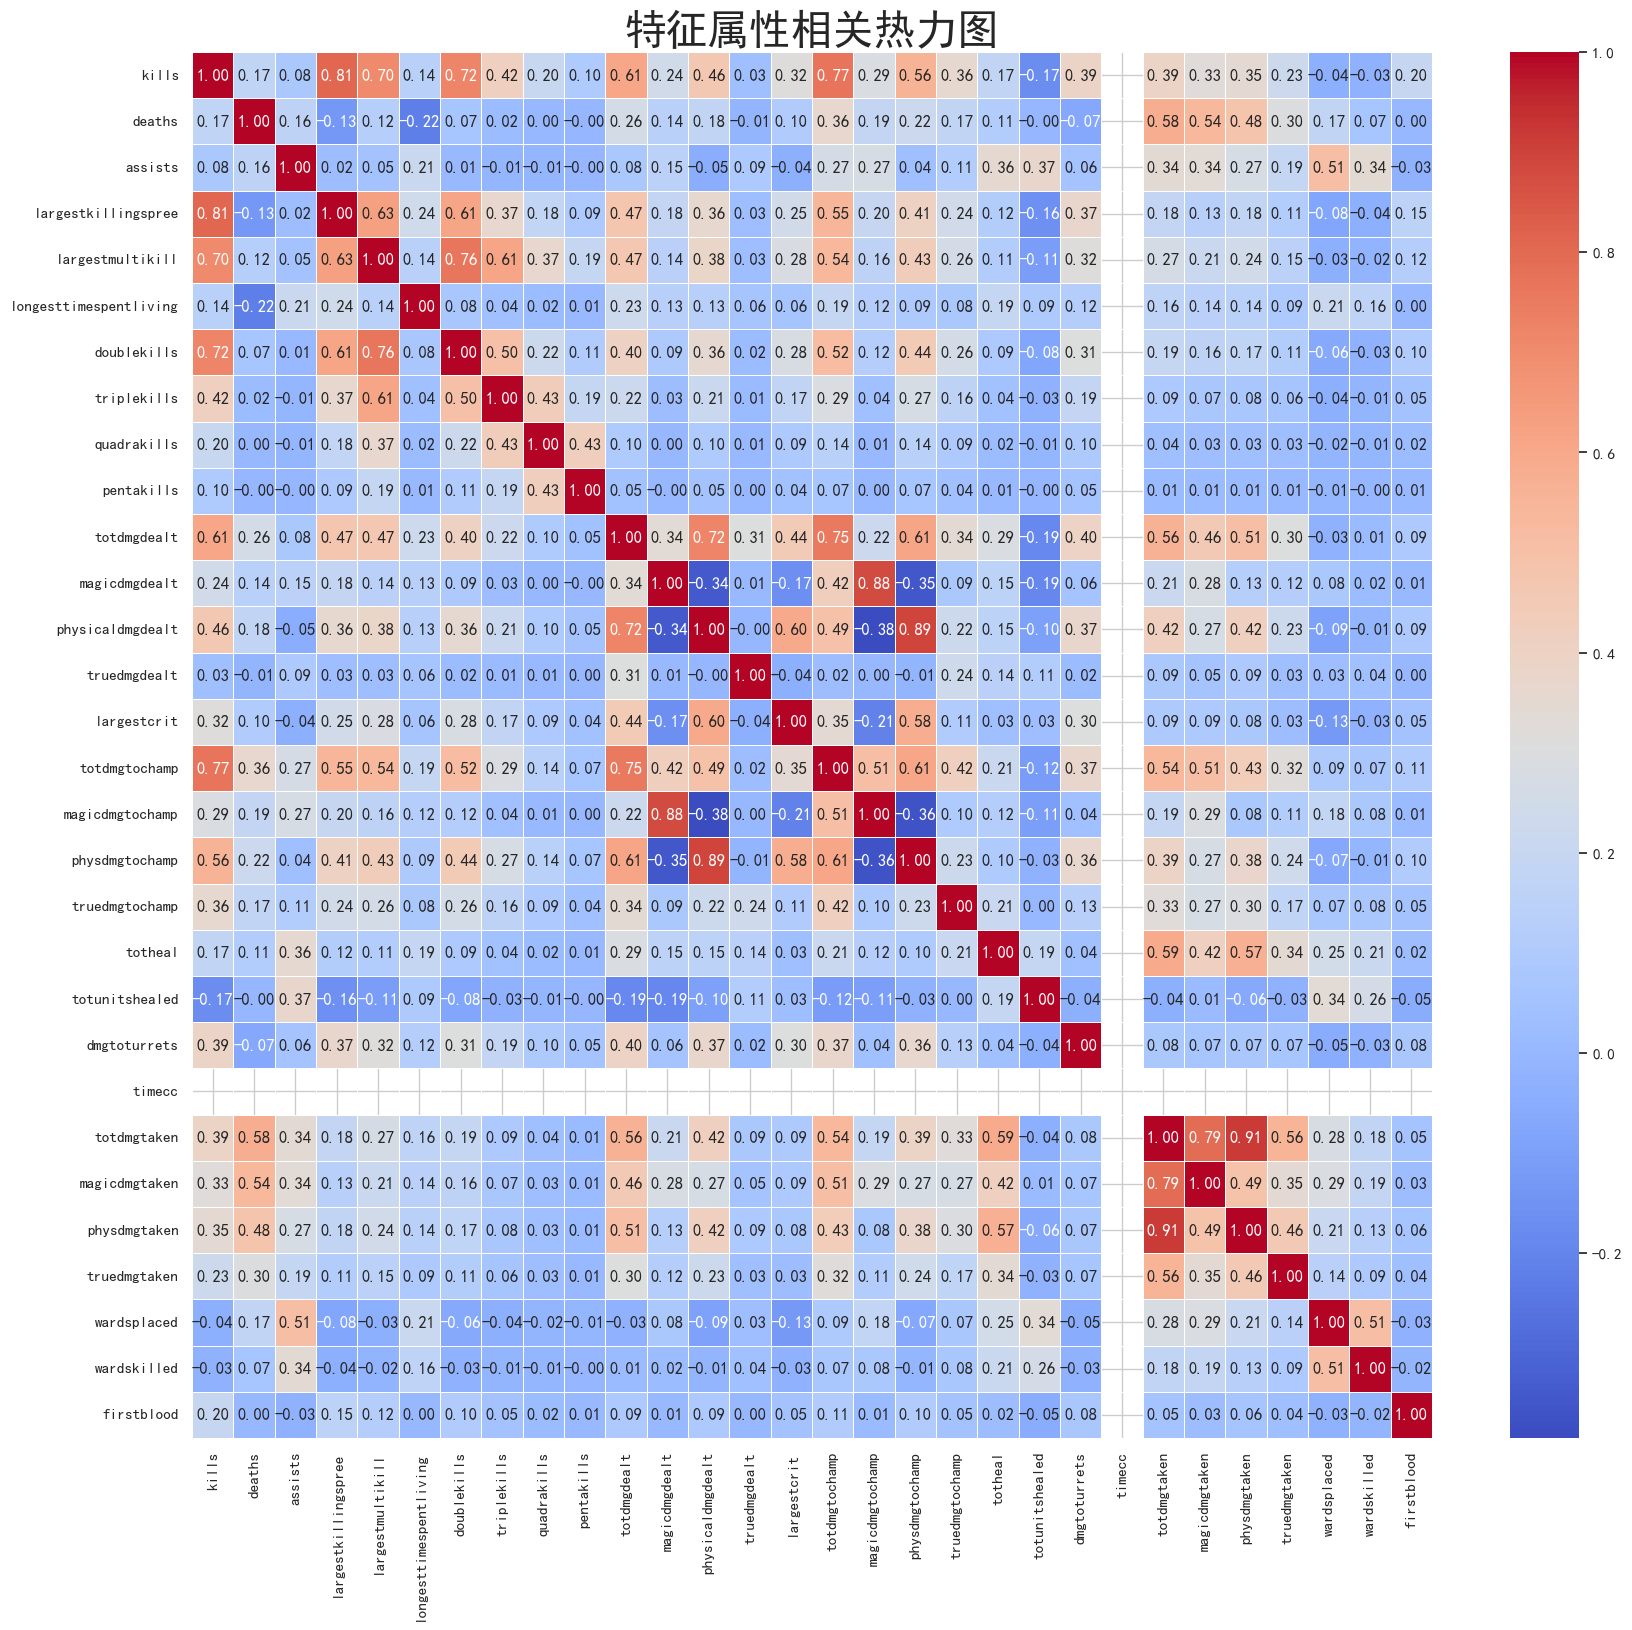

In [125]:
plt.figure(figsize=(20,18))
numeric_features = train_df[features].select_dtypes(include = 'number')

#计算所有数值型特征两两之间的皮尔逊相关系数（Pearson Correlation）,生成一个对称矩阵，每个元素取值范围为[-1, 1]
corr = numeric_features.corr()
sns.heatmap(corr,cmap = "coolwarm",fmt = '.2f',linewidths=0.5,annot=True)
plt.title("特征属性相关热力图",fontsize = 30)
plt.show()


1. **强相关特征**：  
    - `kills` 与 `totdmgtochamp`（对英雄总伤害）、`largestkillingspree`（最大连杀）等战斗类特征正相关（颜色偏红），符合“击杀多伴随伤害高、连杀多”逻辑；  
    - `deaths` 与 `totdmgtaken`（总承受伤害）强正相关（红色），体现“死亡多往往承受伤害高”；  
    - 多杀类特征（`doublekills`/`triplekills` 等）相互正相关，说明多杀成就存在关联（触发双杀易接着三杀）。  

2. **弱相关/负相关**：  
    - `firstblood`（一血）与多数特征相关性弱（颜色偏蓝/接近 0），因一血是单次事件，对全局特征影响有限；  
    - 部分生存类（`longesttimespentliving`）与死亡类特征负相关，符合“存活久则死亡少”常识。  
由于该数据集特征数较多（超过30），为避免维度灾难，可考虑进行PCA降维处理。

## 三、模型预测

In [78]:
y=train_df['win']
X=train_df.iloc[:,1:]
y

0         0
1         0
2         1
3         0
4         0
         ..
179995    1
179996    1
179997    1
179998    1
179999    1
Name: win, Length: 180000, dtype: int64

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [80]:
X_train.shape


(135000, 30)

In [81]:
# 高斯贝叶斯  
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score,accuracy_score,mean_squared_error

pca = PCA(n_components=29,svd_solver='full',whiten=True)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)  
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)
clf_BYS=GaussianNB().fit(X_train_pca,y_train)
pre=clf_BYS.predict(X_test_pca)
print('f1_score:',f1_score(y_test, pre, average='micro'))
print('accuracy_score:',accuracy_score(y_test,pre))
print('均方误差（MSE）:',mean_squared_error(y_test,pre))

(135000, 29)
f1_score: 0.7254222222222222
accuracy_score: 0.7254222222222222
均方误差（MSE）: 0.27457777777777775


In [82]:
#伯努利贝叶斯
from sklearn.decomposition import PCA
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score,accuracy_score,mean_squared_error

pca = PCA(n_components=29,svd_solver='full',whiten=True)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)  
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)
clf_BYS=BernoulliNB().fit(X_train_pca,y_train)
pre=clf_BYS.predict(X_test_pca)
print('f1_score:',f1_score(y_test, pre, average='micro'))
print('accuracy_score:',accuracy_score(y_test,pre))
print('均方误差（MSE）:',mean_squared_error(y_test,pre))

(135000, 29)
f1_score: 0.7646666666666667
accuracy_score: 0.7646666666666667
均方误差（MSE）: 0.23533333333333334


In [83]:
from sklearn.decomposition import PCA
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score,accuracy_score,mean_squared_error

for i in range(1,30):
    pca = PCA(n_components=i,svd_solver='full',whiten=True)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)  
    X_test_pca = pca.transform(X_test)
    #print(X_train_pca.shape)
    clf_BYS=BernoulliNB().fit(X_train_pca,y_train)
    pre=clf_BYS.predict(X_test_pca)
    print(i,'f1_score:',f1_score(y_test, pre, average='micro'),end=' ')
    print('accuracy_score:',accuracy_score(y_test,pre),end=' ')
    print('均方误差（MSE）:',mean_squared_error(y_test,pre),end=' ')
    print()

1 f1_score: 0.5613333333333334 accuracy_score: 0.5613333333333334 均方误差（MSE）: 0.43866666666666665 
2 f1_score: 0.5613333333333334 accuracy_score: 0.5613333333333334 均方误差（MSE）: 0.43866666666666665 
3 f1_score: 0.5613333333333334 accuracy_score: 0.5613333333333334 均方误差（MSE）: 0.43866666666666665 
4 f1_score: 0.5833777777777778 accuracy_score: 0.5833777777777778 均方误差（MSE）: 0.4166222222222222 
5 f1_score: 0.5882 accuracy_score: 0.5882 均方误差（MSE）: 0.4118 
6 f1_score: 0.5875111111111111 accuracy_score: 0.5875111111111111 均方误差（MSE）: 0.4124888888888889 
7 f1_score: 0.6524222222222222 accuracy_score: 0.6524222222222222 均方误差（MSE）: 0.34757777777777776 
8 f1_score: 0.6556 accuracy_score: 0.6556 均方误差（MSE）: 0.3444 
9 f1_score: 0.7041777777777778 accuracy_score: 0.7041777777777778 均方误差（MSE）: 0.2958222222222222 
10 f1_score: 0.7030444444444445 accuracy_score: 0.7030444444444445 均方误差（MSE）: 0.29695555555555553 
11 f1_score: 0.7038666666666666 accuracy_score: 0.7038666666666666 均方误差（MSE）: 0.2961333333333333

In [84]:
#伯努利贝叶斯
from sklearn.decomposition import PCA
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score,accuracy_score,mean_squared_error

pca = PCA(n_components=26,svd_solver='full',whiten=True)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)  
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)
clf_BYS=BernoulliNB().fit(X_train_pca,y_train)
pre=clf_BYS.predict(X_test_pca)
print('f1_score:',f1_score(y_test, pre, average='micro'))
print('accuracy_score:',accuracy_score(y_test,pre))
print('均方误差（MSE）:',mean_squared_error(y_test,pre))

(135000, 26)
f1_score: 0.7715333333333333
accuracy_score: 0.7715333333333333
均方误差（MSE）: 0.22846666666666668


In [85]:
# PCA降维
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score,accuracy_score,mean_squared_error

pca.fit(X_train)
X_train_pca = pca.transform(X_train)  
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)
clf_RF=RandomForestClassifier(criterion='gini',max_features='log2',n_estimators=200,oob_score=True).fit(X_train_pca,y_train)
test_pca=pca.transform(test_df)
pre_RF=clf_RF.predict(test_pca)


(135000, 26)


In [86]:
res=pd.DataFrame(columns=['win'])
for i in pre_RF:
    res=pd.concat([res,pd.DataFrame([i],columns=['win'])])


In [87]:
res.to_csv('./data/submission.csv')